<a href="https://colab.research.google.com/github/jay619/Kaggle-Competitions/blob/dev/1-Titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Problem Statement </h2>

* Build a model to answer: "What sorts of people were more likely to sruvive?"

Importing the required libraries and loading the data

In [ ]:
# !pip3 install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE_PATH_TRAIN = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'
FILE_PATH_TEST = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'

<h3> Training Dataset </h3>

<table>
  <tr>
  <th>Variable</th>
  <th>Definition</th>
  <th>Key</th>
  </tr>
  <tr>
  <td>survival</td>
  <td>Survival</td>
  <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
  <td>pclass</td>
  <td>Ticket Class</td>
  <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
  <td>age</td>
  <td>Age in years</td>
  <td>-</td>
  </tr>
  <tr>
  <td>sibsp</td>
  <td># of siblings/spouses<br>aboard the Titanic</td>
  <td>-</td>
  </tr>
  <tr>
  <td>parch</td>
  <td># of parents/children<br>aboard the Titanic</td>
  <td>-</td>
  </tr>
  <tr>
  <td>ticket</td>
  <td>Ticket Number</td>
  <td>-</td>
  </tr>
  <tr>
  <td>fare</td>
  <td>Passenger Fare</td>
  <td>-</td>
  </tr>
  <tr>
  <td>Cabin</td>
  <td>Cabin Number</td>
  <td>-</td>
  </tr>
  <tr>
  <td>embarked</td>
  <td>Port of Embarkation</td>
  <td> C = Cherbourg, Q = Queenstown, <br> S = Southampton </td>
  </tr>
</table>

In [2]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [3]:
train = load_data(FILE_PATH_TRAIN)
test = load_data(FILE_PATH_TEST)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3> Observations: </h3>

- Model will be based on features like Pclass, Sex, Age, SibSp
- Cabin has a lot of NULL values (687) (not a good feature to use)
- Age is NULL for few of the passengers (177 passengers)
- Supervised learning because labels are available in the training dataset i.e. Survived either 0(No) or 1(Yes)
- Classification example since we're classifying if the passenger survived or not based on various attributes
- Based on the correlationg matrix, people who survived were highly dependent on the fare they paid for the ticket and slightly on the the # of parents'children aboard the ship

In [6]:
corr_matrix = train.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Text(0.5, 0, 'Survived')

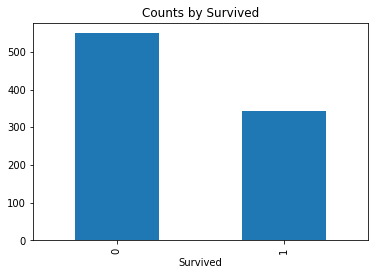

In [7]:
ax = train['Survived'].value_counts().plot(kind='bar', title='Counts by Survived')
ax.set_xlabel('Survived')

- 342 Passengers Survived
- 549 Passengers didn't surive

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


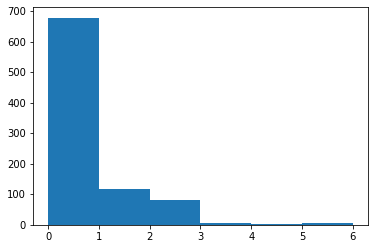

In [8]:
print(train['Parch'].value_counts())
plt.hist(train['Parch'], bins=6)
plt.show()

In [9]:
print(train[['Survived', 'Parch']].value_counts())

Survived  Parch
0         0        445
1         0        233
          1         65
0         1         53
          2         40
1         2         40
0         4          4
          5          4
1         3          3
0         3          2
          6          1
1         5          1
dtype: int64


- Majority of passengers were traveling without their parents/children (678 passengers)
- Out of the 678 passengers who were traveling alone, only 233 survived (~ 34%) (I would've expected the % to be higher??)

In [27]:
# !pip3 install scikit-learn
# !pip3 install missingno

     |████████████████████████████████| 292 kB 600 kB/s 


In [28]:
import missingno as miss

<AxesSubplot:>

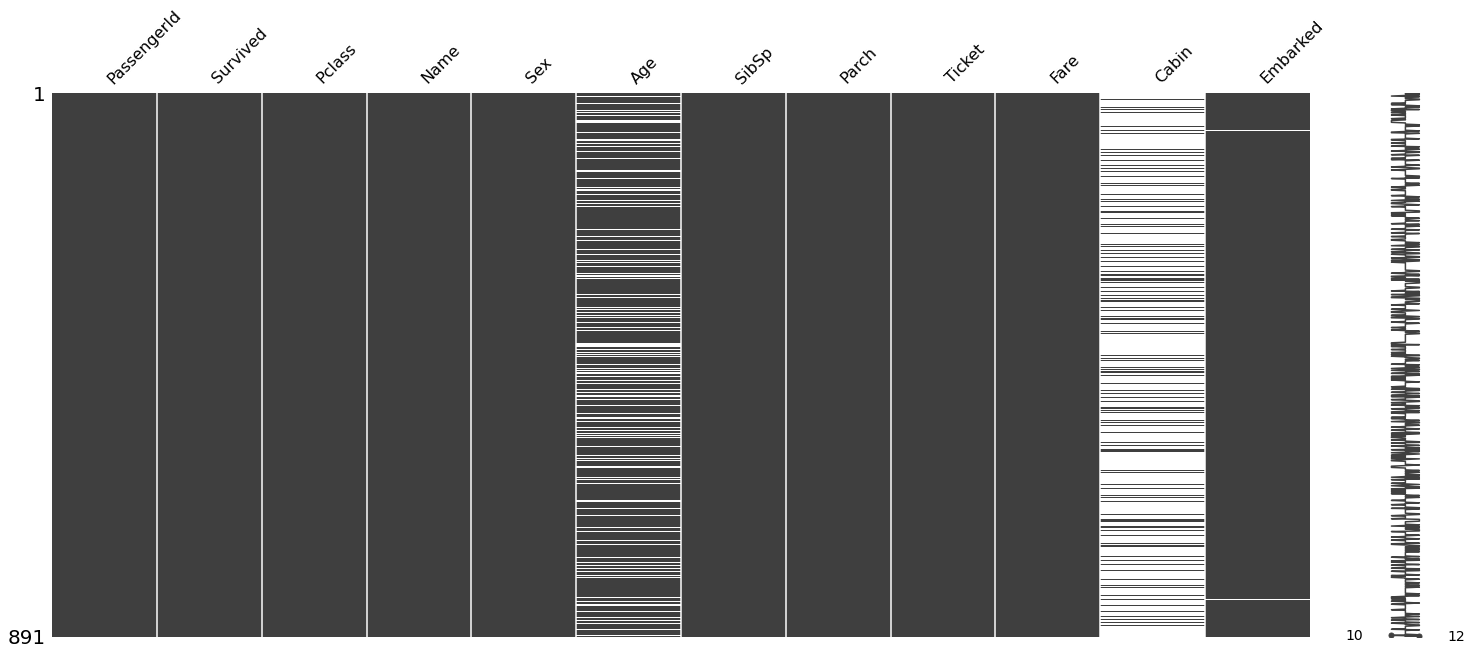

In [29]:
miss.matrix(train)

* Came across this module missingno, which helps visualize the frequency of missing values in the dataset
* From the matrix we can see, Age and Cabin have the most missing values

<AxesSubplot:xlabel='Survived', ylabel='count'>

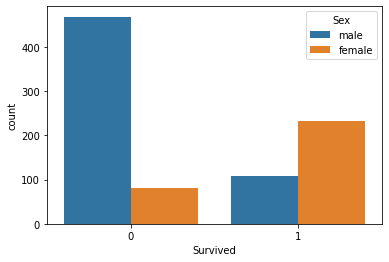

In [36]:
import seaborn as sns
sns.countplot(x = train['Survived'], data = train, hue = train['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

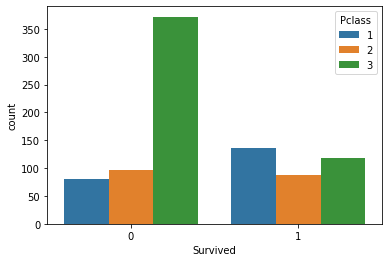

In [41]:
sns.countplot(x = train['Survived'], data = train, hue = train['Pclass'd'])

* Out of the males and females, females survival rate was higher than males
* Out of all the 3 classes, first class had the highest survival count followed by third class and second class being the lowest